<a href="https://colab.research.google.com/github/alcideschaux/VPH-CDE/blob/main/VPH_CDE_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estadística descriptiva

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, mannwhitneyu
from scipy.stats import rankdata

df = pd.read_csv('VPH-CDE-DATA.csv')
display(df.head())

,edad,estado_civil,escolaridad_nivel,hijos,tabaquismo,alcohol,menarca,anticonceptivos,parejas_sexuales,antecedentes_cancer,vph
0,31,Union libre,Terciario,2,Sí,Frecuentemente,15,Sí,3,No,Positivo
1,43,Soltera,Secundario,4,No,Frecuentemente,15,Sí,4,No,Positivo
2,64,Divorciada,Secundario,4,Sí,Frecuentemente,15,No,3,No,Negativo
3,45,Soltera,Primario,4,No,No,12,Sí,2,No,Negativo
4,27,Casada,Primario,1,No,No,13,Sí,1,No,Negativo


In [2]:
# Transformar en categórica ordinal
from pandas.api.types import CategoricalDtype

# Escolaridad
escolaridad_nivel_categorias = CategoricalDtype(categories=['Primario', 'Secundario', 'Terciario'], ordered=True)
df['escolaridad_nivel'] = df['escolaridad_nivel'].astype(escolaridad_nivel_categorias)

# Consumo de alcohol
alcohol_categorias = CategoricalDtype(categories=['No', 'Ocasionalmente', 'Frecuentemente'], ordered=True)
df['alcohol'] = df['alcohol'].astype(alcohol_categorias)

## Edad (en años)

count    127.000000
mean      40.992126
std        9.637473
min       21.000000
25%       33.500000
50%       40.000000
75%       47.000000
max       64.000000
Name: edad, dtype: float64


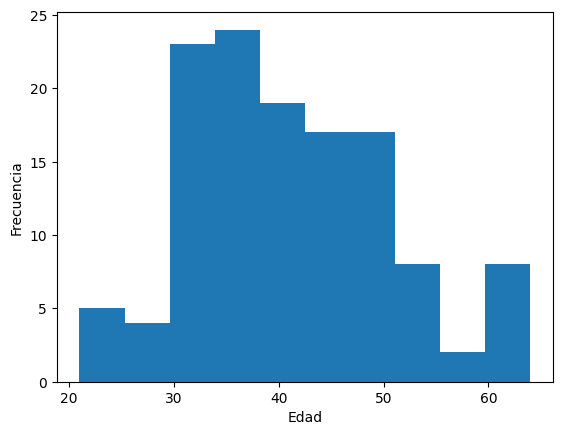

In [3]:
# Descripción
print(df['edad'].describe())

# Gráfico
plt.hist(df['edad'])
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

## Estado civil

estado_civil
Casada         56
Union libre    40
Soltera        27
Viuda           3
Divorciada      1
Name: count, dtype: int64


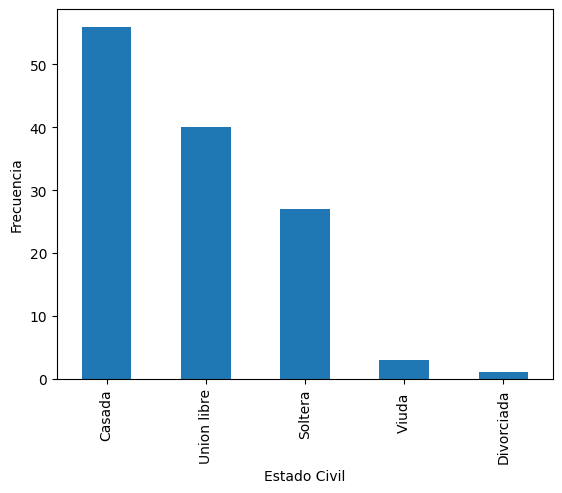

In [4]:
# Descripción
print(df['estado_civil'].value_counts())

# Gráfico
df['estado_civil'].value_counts().plot(kind='bar')
plt.xlabel('Estado Civil')
plt.ylabel('Frecuencia')
plt.show()


## Escolaridad (nivel educativo)

escolaridad_nivel
Secundario    86
Primario      21
Terciario     20
Name: count, dtype: int64


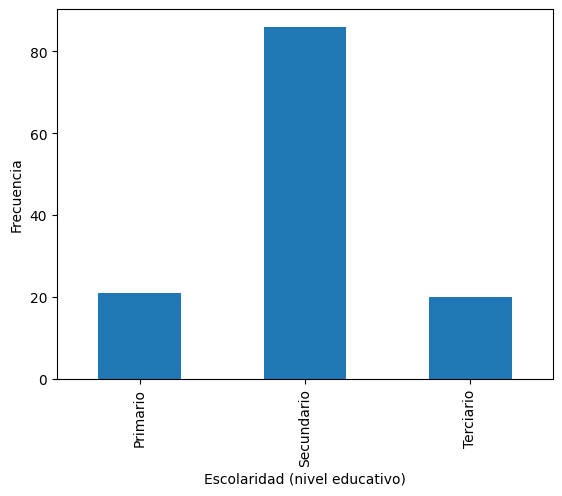

In [5]:
# Descripción
print(df['escolaridad_nivel'].value_counts())

# Gráfico
df['escolaridad_nivel'].value_counts(sort=False).plot(kind='bar')
plt.xlabel('Escolaridad (nivel educativo)')
plt.ylabel('Frecuencia')
plt.show()

## Número de hijos

count    127.000000
mean       2.748031
std        1.593481
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        8.000000
Name: hijos, dtype: float64


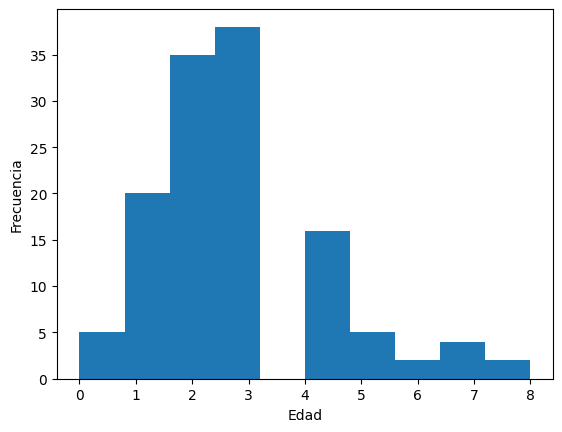

In [6]:
# Descripción
print(df['hijos'].describe())

# Gráfico
plt.hist(df['hijos'])
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

## Tabaquismo

tabaquismo
No    122
Sí      5
Name: count, dtype: int64


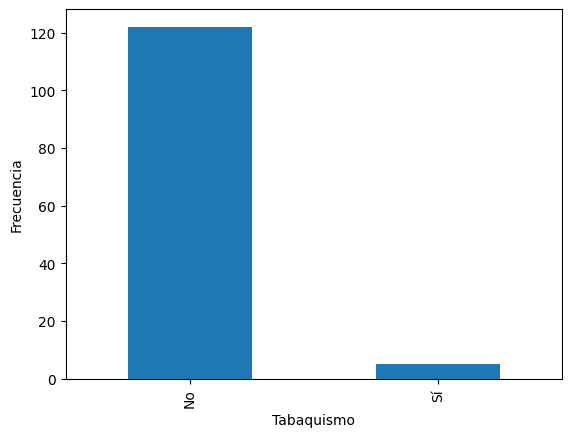

In [7]:
# Descripción
print(df['tabaquismo'].value_counts())

# Gráfico
df['tabaquismo'].value_counts().plot(kind='bar')
plt.xlabel('Tabaquismo')
plt.ylabel('Frecuencia')
plt.show()

## Consumo de alcohol

alcohol
No                87
Ocasionalmente    37
Frecuentemente     3
Name: count, dtype: int64


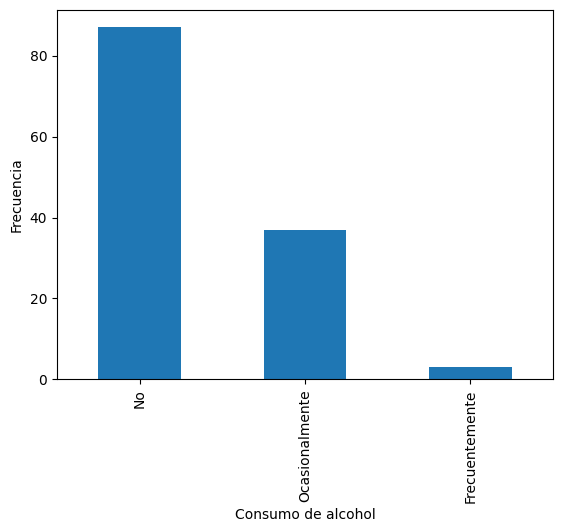

In [8]:
# Descripción
print(df['alcohol'].value_counts())

# Gráfico
df['alcohol'].value_counts().plot(kind='bar')
plt.xlabel('Consumo de alcohol')
plt.ylabel('Frecuencia')
plt.show()

## Menarca

count    127.000000
mean      13.236220
std        1.743271
min        9.000000
25%       12.000000
50%       13.000000
75%       15.000000
max       18.000000
Name: menarca, dtype: float64


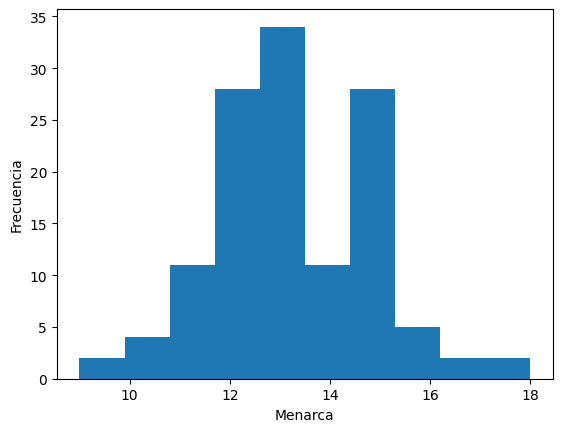

In [9]:
# Descripción
print(df['menarca'].describe())

# Gráfico
plt.hist(df['menarca'])
plt.xlabel('Menarca')
plt.ylabel('Frecuencia')
plt.show()

## Uso de anticonceptivos

anticonceptivos
Sí    88
No    39
Name: count, dtype: int64


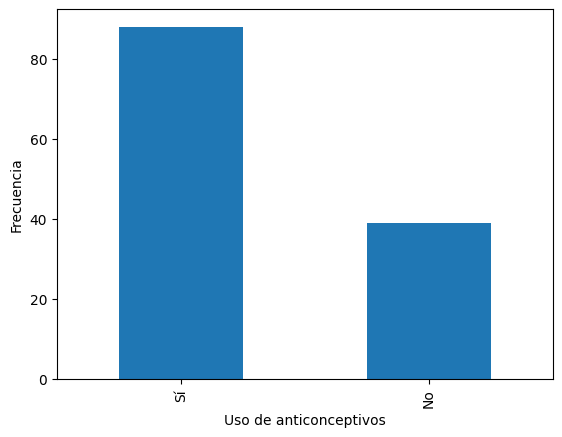

In [10]:
# Descripción
print(df['anticonceptivos'].value_counts())

# Gráfico
df['anticonceptivos'].value_counts().plot(kind='bar')
plt.xlabel('Uso de anticonceptivos')
plt.ylabel('Frecuencia')
plt.show()

## Parejas sexuales

count    127.000000
mean       2.472441
std        1.582778
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       15.000000
Name: parejas_sexuales, dtype: float64


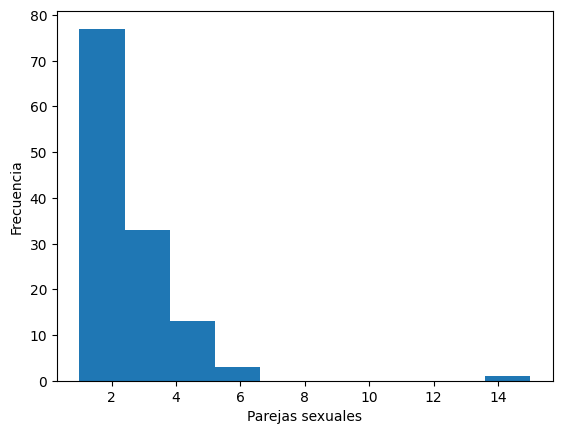

In [11]:
# Descripción
print(df['parejas_sexuales'].describe())

# Gráfico
plt.hist(df['parejas_sexuales'])
plt.xlabel('Parejas sexuales')
plt.ylabel('Frecuencia')
plt.show()

## Antecedentes familiares de cáncer

antecedentes_cancer
No    120
Sí      7
Name: count, dtype: int64


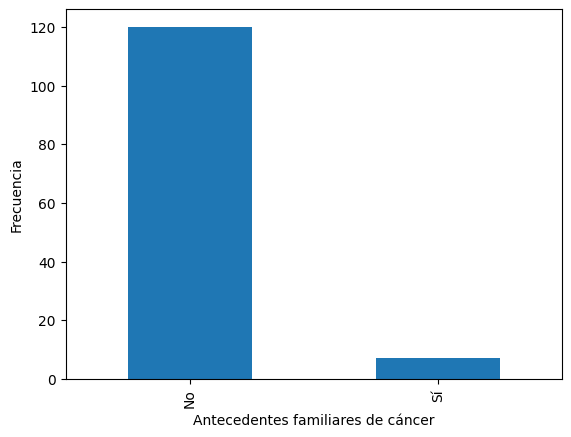

In [12]:
# Descripción
print(df['antecedentes_cancer'].value_counts())

# Gráfico
df['antecedentes_cancer'].value_counts().plot(kind='bar')
plt.xlabel('Antecedentes familiares de cáncer')
plt.ylabel('Frecuencia')
plt.show()

## Presencia de VPH

vph
Negativo    109
Positivo     18
Name: count, dtype: int64


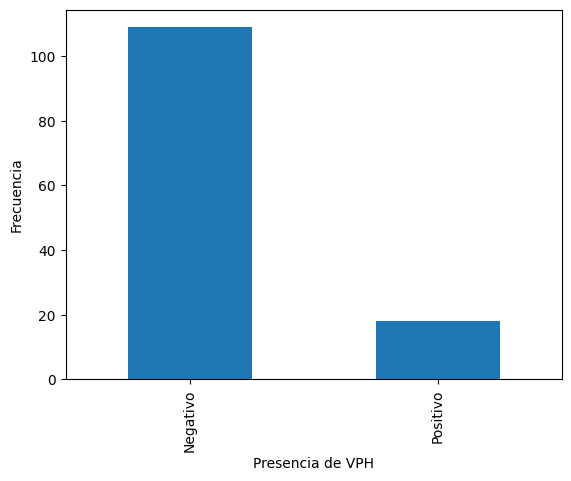

In [13]:
# Descripción
print(df['vph'].value_counts())

# Gráfico
df['vph'].value_counts().plot(kind='bar')
plt.xlabel('Presencia de VPH')
plt.ylabel('Frecuencia')
plt.show()

# Asociación de variables con VPH

In [14]:
# Asociación con variables numéricas
def analizar_asociacion_numerica(variable):
    # Mann-Whitney U
    vph_positivo = df[df['vph'] == 'Positivo'][variable]
    vph_negativo = df[df['vph'] == 'Negativo'][variable]
    statistic, p_value = mannwhitneyu(vph_positivo, vph_negativo)

    # Coeficiente de correlación de rango biserial puntual (rpb)
    # x = df[variable]
    # Convertir la variable 'vph' a numérica (0 para 'Negativo', 1 para 'Positivo')
    # y = df['vph'].map({'Negativo': 0, 'Positivo': 1})
    # n = len(x)
    # n1 = sum(y)  # Número de casos 'Positivo'
    # n0 = n - n1  # Número de casos 'Negativo'
    # rank_sum = sum(rankdata(x)[y == 1])  # Suma de rangos para casos 'Positivo'
    # u = rank_sum - (n1 * (n1 + 1)) / 2
    # rpb = (2 * u) / (n0 * n1)

    # Probabilidad de superioridad: Tamaño del efecto de la prueba de Mann-Whitney
    n1 = len(vph_positivo)
    n2 = len(vph_negativo)
    r = statistic / (n1 * n2)

    print(f'Análisis de asociación entre VPH y {variable}:')
    print(f'Prueba de Mann-Whitney U: Estadístico={statistic}')
    print(f'Valor P={p_value}')
    print(f'Tamaño del efecto: {r}')

    # Diagrama de cajas
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='vph', y=variable, data=df)
    plt.title(f'Asociación entre VPH y {variable}')
    plt.xlabel('Presencia de VPH')
    plt.ylabel(variable)
    plt.show()

# Asociacion con variables categóricas
def analizar_asociacion_categorica(variable):
    contingency_table = pd.crosstab(df[variable], df['vph'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    n = contingency_table.sum().sum()
    phi2 = chi2/n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    cramers_v = np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

    print(f"Análisis de asociación entre VPH y {variable}:")
    print("Tabla de contingencia:")
    print(contingency_table)
    print(f"Chi-cuadrado: {chi2}")
    print(f'Valor P: {p}')
    print(f'V de Cramer: {cramers_v}')

    #Gráfico de barras agrupadas
    contingency_table.plot(kind='bar')
    plt.title(f'Asociación entre VPH y {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.show()

## Edad y VPH

Análisis de asociación entre VPH y edad:
Prueba de Mann-Whitney U: Estadístico=935.0
Valor P=0.7528753290681736
Tamaño del efecto: 0.4765545361875637


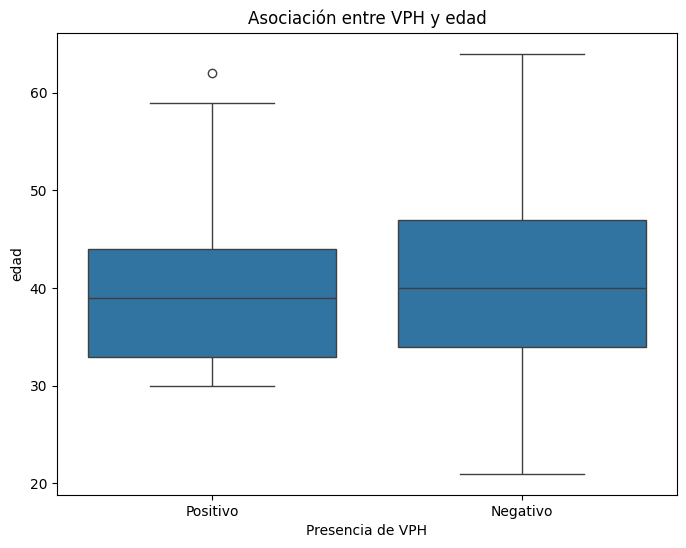

In [15]:
analizar_asociacion_numerica('edad')

## Estado civil y VPH

Análisis de asociación entre VPH y estado_civil:
Tabla de contingencia:
vph           Negativo  Positivo
estado_civil                    
Casada              51         5
Divorciada           1         0
Soltera             24         3
Union libre         31         9
Viuda                2         1
Chi-cuadrado: 4.824841027134605
Valor P: 0.30574659346249244
V de Cramer: 0.07933978335766734


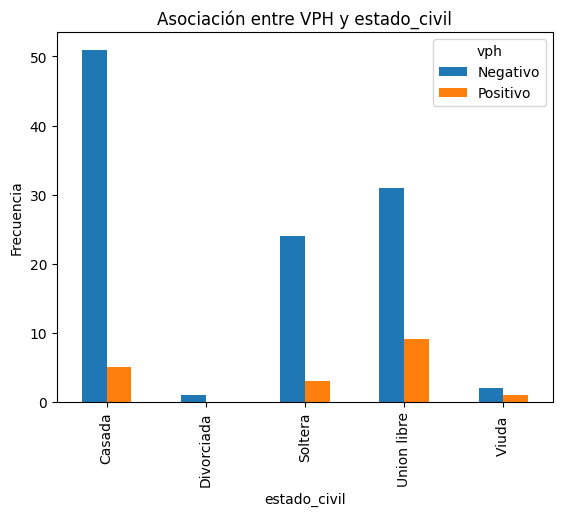

In [16]:
analizar_asociacion_categorica('estado_civil')

## Escolaridad y VPH

Análisis de asociación entre VPH y escolaridad_nivel:
Tabla de contingencia:
vph                Negativo  Positivo
escolaridad_nivel                    
Primario                 19         2
Secundario               73        13
Terciario                17         3
Chi-cuadrado: 0.44729915459059894
Valor P: 0.7995952816227713
V de Cramer: 0.0


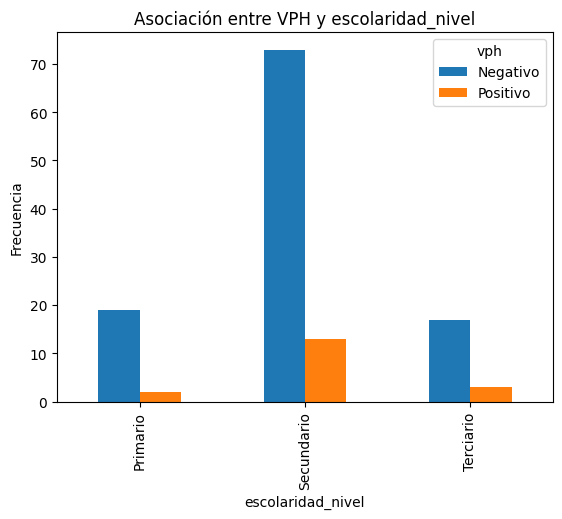

In [17]:
analizar_asociacion_categorica('escolaridad_nivel')

## Número de hijos y VPH

Análisis de asociación entre VPH y hijos:
Prueba de Mann-Whitney U: Estadístico=1122.0
Valor P=0.31808588885450173
Tamaño del efecto: 0.5718654434250765


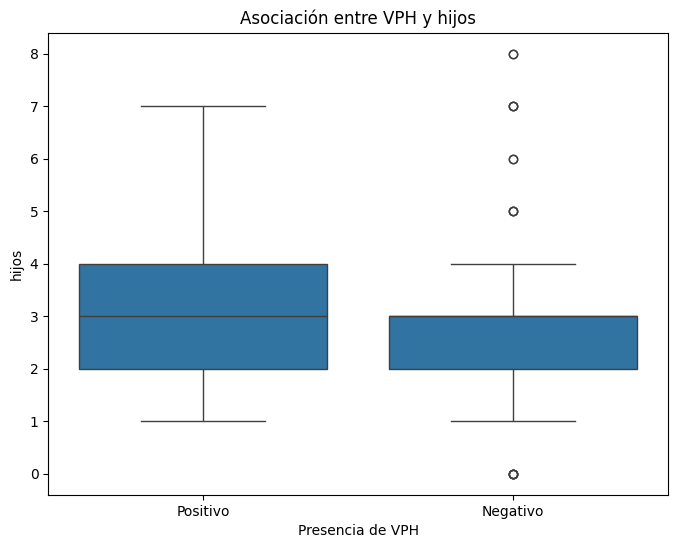

In [18]:
analizar_asociacion_numerica('hijos')

## Tabaquismo y VPH

Análisis de asociación entre VPH y tabaquismo:
Tabla de contingencia:
vph         Negativo  Positivo
tabaquismo                    
No               105        17
Sí                 4         1
Chi-cuadrado: 0.0
Valor P: 1.0
V de Cramer: 0.0


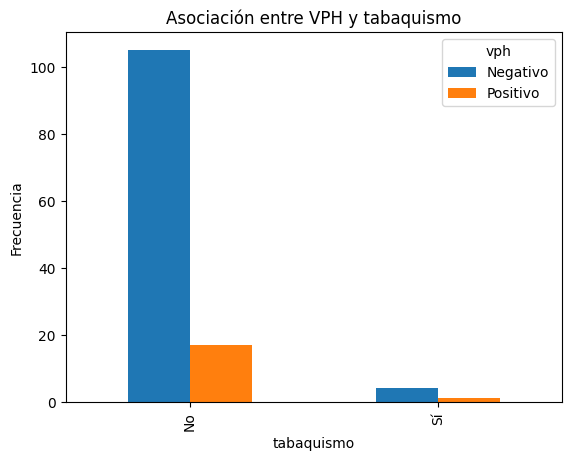

In [19]:
analizar_asociacion_categorica('tabaquismo')

## Consumo de alcohol y VPH

Análisis de asociación entre VPH y alcohol:
Tabla de contingencia:
vph             Negativo  Positivo
alcohol                           
No                    77        10
Ocasionalmente        31         6
Frecuentemente         1         2
Chi-cuadrado: 7.43603204596561
Valor P: 0.024282095206935278
V de Cramer: 0.20741225831725202


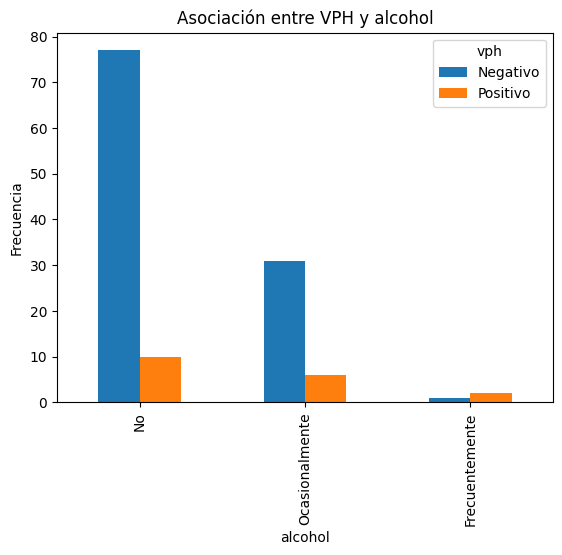

In [20]:
analizar_asociacion_categorica('alcohol')

## Menarca y VPH

Análisis de asociación entre VPH y menarca:
Prueba de Mann-Whitney U: Estadístico=692.5
Valor P=0.0419576911177104
Tamaño del efecto: 0.35295616717635064


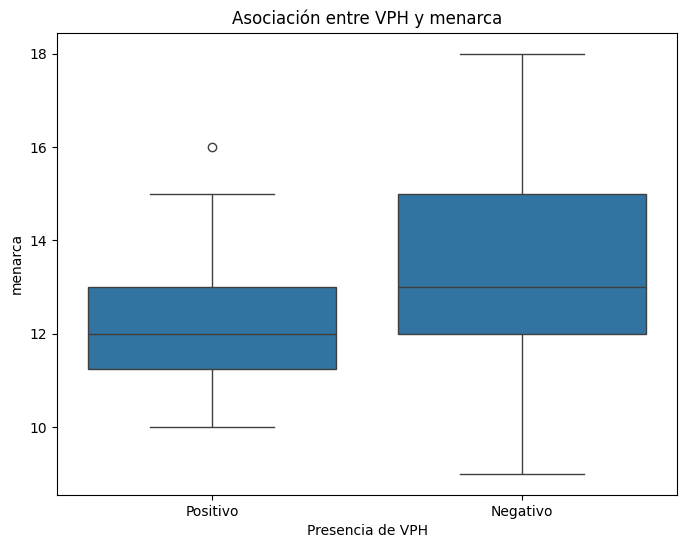

In [21]:
analizar_asociacion_numerica('menarca')

## Uso de anticonceptivos y VPH

Análisis de asociación entre VPH y anticonceptivos:
Tabla de contingencia:
vph              Negativo  Positivo
anticonceptivos                    
No                     35         4
Sí                     74        14
Chi-cuadrado: 0.3212021636620261
Valor P: 0.5708860827630176
V de Cramer: 0.0


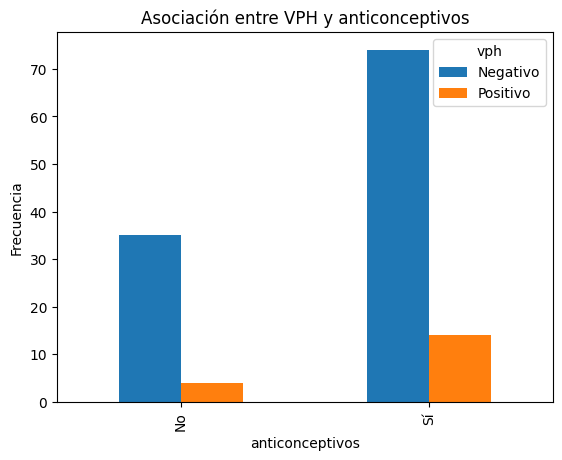

In [22]:
analizar_asociacion_categorica('anticonceptivos')

## Parejas sexuales y VPH

Análisis de asociación entre VPH y parejas_sexuales:
Prueba de Mann-Whitney U: Estadístico=1428.0
Valor P=0.001224789897086522
Tamaño del efecto: 0.72782874617737


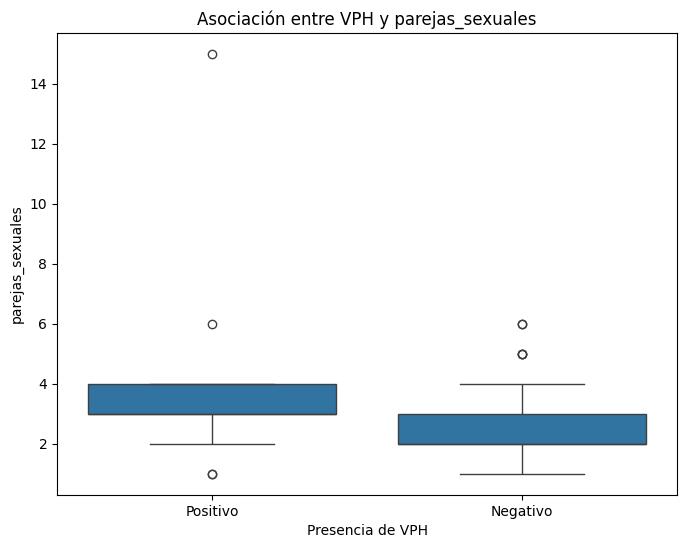

In [23]:
analizar_asociacion_numerica('parejas_sexuales')

## Antecedentes familiares y VPH

Análisis de asociación entre VPH y antecedentes_cancer:
Tabla de contingencia:
vph                  Negativo  Positivo
antecedentes_cancer                    
No                        102        18
Sí                          7         0
Chi-cuadrado: 0.30101314863356143
Valor P: 0.5832479636783612
V de Cramer: 0.0


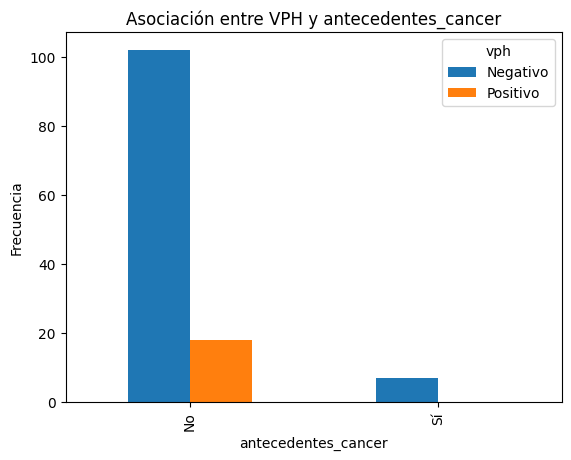

In [24]:
analizar_asociacion_categorica('antecedentes_cancer')